In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats,optimize

In [2]:
def gaussian(x, c=0, sigma=1):
    return np.exp(-((x-c)/sigma)**2/2) / (sigma*np.sqrt(2*np.pi))

In [3]:
mydata = np.concatenate((np.random.normal(loc=0, size=(500,)), np.random.normal(loc=1.5, size=(500,))))

In [5]:
def objective(params, data=mydata):
    n = int((params.shape[0]+1)/3)
    weights = params[:n-1]
    lastw = 1-np.sum(weights)
    allweights = np.concatenate((weights, [lastw,]))
    p_array = params[n-1:].reshape((n,2))
    ll = 0
    for x in mydata:
        f = 0
        for (w, p) in zip(allweights, p_array):
            f += w*gaussian(x, c=p[0], sigma=p[1])
        ll += np.log(f)
    if lastw < 0:
        return 1e12
    elif lastw > 1:
        return 1e12
    else:
        return -ll

In [6]:
params = np.array([0.5, 1, 1, 2, 1])
objective(params)

1851.2908266264617

In [7]:
def objective2(params, data=mydata):
    n = int(params.shape[0]/2)
    p_array = params.reshape((n,2))
    ll = 0
    for x in mydata:
        f = np.zeros((n,))
        for i, p in enumerate(p_array):
            f[i] = gaussian(x, c=p[0], sigma=p[1])/n
        ll += np.log(np.max(f))
    return -ll

In [8]:
objective2(params[1:])

2176.668852656571

In [9]:
x = np.linspace(-3, 4, 80)
X, Y = np.meshgrid(x, x)
out = np.zeros(X.ravel().shape)
out2 = np.zeros(X.ravel().shape)
for i, (a, b) in enumerate(zip(X.ravel(), Y.ravel())):
    out[i] = objective(np.array([0.5, a, 1, b, 1]))
    out2[i] = objective2(np.array([a, 1, b, 1]))

In [10]:
res = optimize.minimize(objective, [0.5, 0.4, 0.5, 2.7, 0.5], method='Nelder-Mead')
print(res)

 final_simplex: (array([[ 0.33799251, -0.2562787 ,  0.8543562 ,  1.33349615,  1.05855873],
       [ 0.33795151, -0.25634547,  0.85434159,  1.33344042,  1.05858577],
       [ 0.33797485, -0.25630273,  0.85435639,  1.33345725,  1.05858106],
       [ 0.33793532, -0.25635686,  0.85432608,  1.33340207,  1.05859072],
       [ 0.33796366, -0.25632527,  0.85434951,  1.33345239,  1.05857122],
       [ 0.33801667, -0.25622852,  0.8543721 ,  1.33353752,  1.05855416]]), array([1634.48103898, 1634.48103899, 1634.481039  , 1634.481039  ,
       1634.48103901, 1634.48103902]))
           fun: 1634.4810389841682
       message: 'Optimization terminated successfully.'
          nfev: 537
           nit: 339
        status: 0
       success: True
             x: array([ 0.33799251, -0.2562787 ,  0.8543562 ,  1.33349615,  1.05855873])


In [11]:
res2 = optimize.minimize(objective2, [0.4, 0.5, 2.7, 0.5], method='Nelder-Mead')
print(res2)

 final_simplex: (array([[-0.1942601 ,  0.71568778,  1.83115065,  0.73918308],
       [-0.19430531,  0.71567917,  1.83122009,  0.73912251],
       [-0.19433123,  0.71569856,  1.83109045,  0.73914404],
       [-0.19423313,  0.71571051,  1.831144  ,  0.73911887],
       [-0.1942788 ,  0.71562866,  1.83115388,  0.73911542]]), array([1793.36909828, 1793.36910287, 1793.3691034 , 1793.36910391,
       1793.36910546]))
           fun: 1793.3690982834605
       message: 'Optimization terminated successfully.'
          nfev: 210
           nit: 125
        status: 0
       success: True
             x: array([-0.1942601 ,  0.71568778,  1.83115065,  0.73918308])


## Gaussian Mixture

$p(x) = \alpha N(x;\mu_1, \sigma_1) + (1-\alpha) N(x; \mu_2, \sigma_2)$

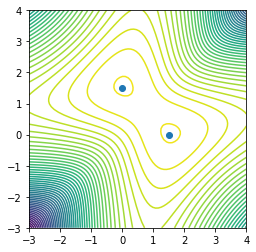

In [19]:
plt.contour(X, Y, out.reshape((80, 80)), 50, cmap='viridis_r')
# plt.scatter([res.x[1], res.x[3]], [res.x[3], res.x[1]])
plt.gca().set_aspect('equal')
plt.scatter([0, 1.5], [1.5, 0])

## Maximum Gaussian

$p(x) = \max\{N(x;\mu_1, \sigma_1), N(x; \mu_2, \sigma_2)\}$

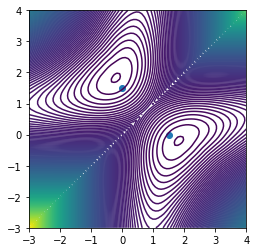

In [23]:
plt.contour(X, Y, out2.reshape((80, 80)), 200, cmap='viridis')
# plt.scatter([res2.x[0], res2.x[2]], [res2.x[2], res2.x[0]])
plt.gca().set_aspect('equal')
plt.scatter([0, 1.5], [1.5, 0])

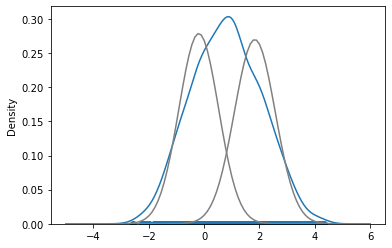

In [28]:
x = np.linspace(-5, 6, 100)
sns.kdeplot(mydata)
plt.gca().scatter(mydata, np.zeros(mydata.shape[0]))
y1 = gaussian(x, c=res2.x[0], sigma=res2.x[1])/2
y2 = gaussian(x, c=res2.x[2], sigma=res2.x[3])/2
plt.gca().plot(x, y1, color='gray')
plt.gca().plot(x, y2, color='gray')


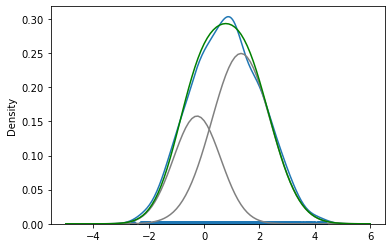

In [15]:
x = np.linspace(-5, 6, 100)
sns.kdeplot(mydata)
plt.gca().scatter(mydata, np.zeros(mydata.shape[0]))
y1 = gaussian(x, c=res.x[1], sigma=res.x[2])*res.x[0]
y2 = gaussian(x, c=res.x[3], sigma=res.x[4])*(1-res.x[0])
plt.gca().plot(x, y1, color='gray')
plt.gca().plot(x, y2, color='gray')
plt.plot(x, y1+y2, color='green')

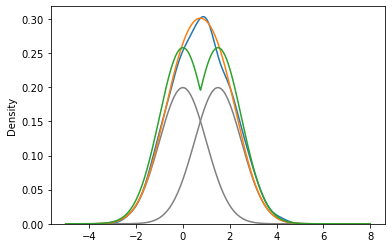

In [29]:
x = np.linspace(-5, 8, 500)
sns.kdeplot(mydata)
dx = x[1]-x[0]
y1 = gaussian(x, c=0)
y2 = gaussian(x, c=1.5)
ymax = np.where(y1>y2, y1, y2)
ymax /= np.sum(ymax)*dx
plt.plot(x, y1/2, color='gray')
plt.plot(x, y2/2, color='gray')
plt.plot(x, y1/2+y2/2)
plt.plot(x, ymax)

In [17]:
-1-2*np.log(np.sqrt(2*np.pi))+2*np.log(0.1)

-7.443047252397436

In [18]:
-1-3*np.log(np.sqrt(2*np.pi))+3*np.log(0.1)

-10.664570878596155